In [1]:
import numpy as np
import pandas as pd
# Pretty display for notebooks
%matplotlib inline

train_data = pd.read_csv('train.csv', nrows = 2000000, parse_dates=["pickup_datetime"])
test_data = pd.read_csv('test.csv', parse_dates=["pickup_datetime"])

display(train_data.head(n=10))
display(test_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1


In [2]:
print(train_data.shape)

(2000000, 8)


In [3]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [4]:
train_data = train_data[train_data.fare_amount>0]
print(train_data.shape)

(1999867, 8)


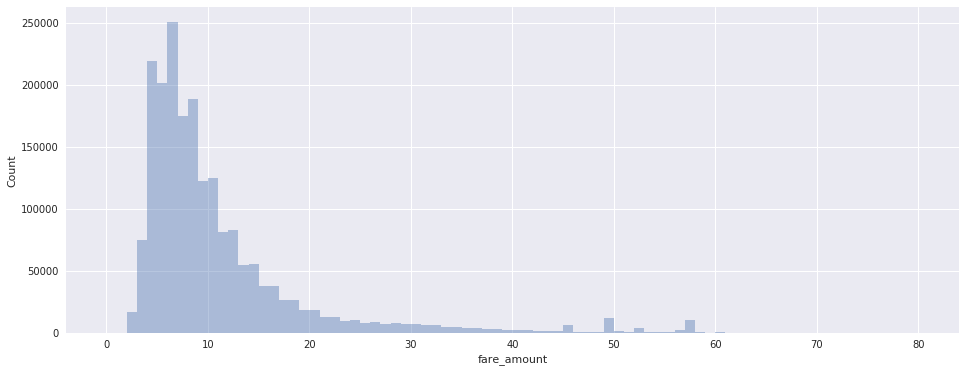

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)})

g=sns.distplot(train_data[train_data.fare_amount<80].fare_amount, norm_hist=False, kde=False, bins=80)
g.set_ylabel("Count")

In [6]:
#clearly most of the fare amounts lie between 0 to 10 
#check for null
print(train_data.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64


In [7]:
train_data = train_data.drop(train_data[train_data.isnull().any(1)].index, axis = 0)
print(train_data.shape)

test_data = test_data.drop(test_data[test_data.isnull().any(1)].index, axis = 0)
print(test_data.shape)


(1999853, 8)
(9914, 7)


In [8]:
#latitude range -90 to 90
train_data = train_data[train_data.pickup_latitude>=-90]
train_data = train_data[train_data.pickup_latitude<=90]
train_data = train_data[train_data.dropoff_latitude>=-90]
train_data = train_data[train_data.dropoff_latitude<=90]
print(train_data.shape)

test_data = test_data[test_data.pickup_latitude>=-90]
test_data = test_data[test_data.pickup_latitude<=90]
test_data = test_data[test_data.dropoff_latitude>=-90]
test_data = test_data[test_data.dropoff_latitude<=90]
print(test_data.shape)

(1999805, 8)
(9914, 7)


In [9]:
#longitude range -180 to 180

train_data = train_data[train_data.pickup_longitude>=-180]
train_data = train_data[train_data.pickup_longitude<=180]
train_data = train_data[train_data.dropoff_longitude>=-180]
train_data = train_data[train_data.dropoff_longitude<=180]
print(train_data.shape)

test_data = test_data[test_data.pickup_longitude>=-180]
test_data = test_data[test_data.pickup_longitude<=180]
test_data = test_data[test_data.dropoff_longitude>=-180]
test_data = test_data[test_data.dropoff_longitude<=180]
print(test_data.shape)

(1999768, 8)
(9914, 7)


In [10]:
from geopy import distance
from geopy import Point

def calculate_dist(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    p1 = Point(pickup_lat, pickup_long)
    p2 = Point(dropoff_lat, dropoff_long)
    return distance.distance(p1,p2).kilometers

In [11]:
train_data['Distance']=train_data[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(lambda x: calculate_dist(x[0], x[1], x[2], x[3]), axis=1)
display(train_data.head(n=10))

test_data['Distance']=test_data[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(lambda x: calculate_dist(x[0], x[1], x[2], x[3]), axis=1)
display(test_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.320991
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.423802
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618182
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.959671
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.382833
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.221143
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.931700
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.566812
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.871424
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.101426


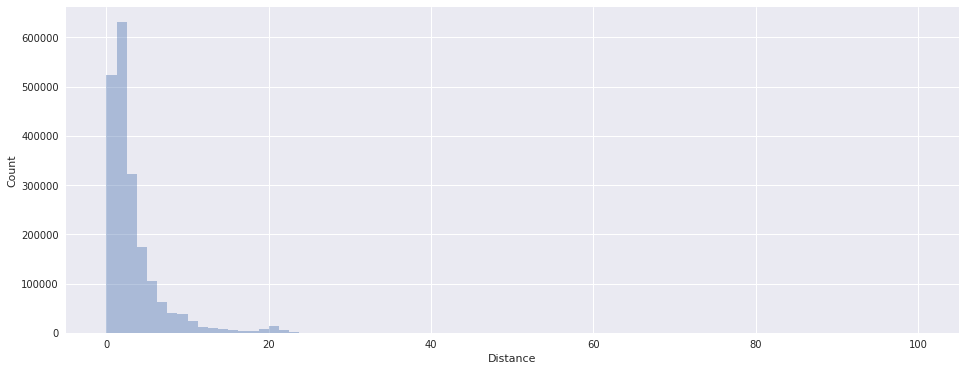

In [12]:
g=sns.distplot(train_data[train_data.Distance<100].Distance, norm_hist=False, kde=False, bins=80)
g.set_ylabel("Count")

In [13]:
display(train_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028


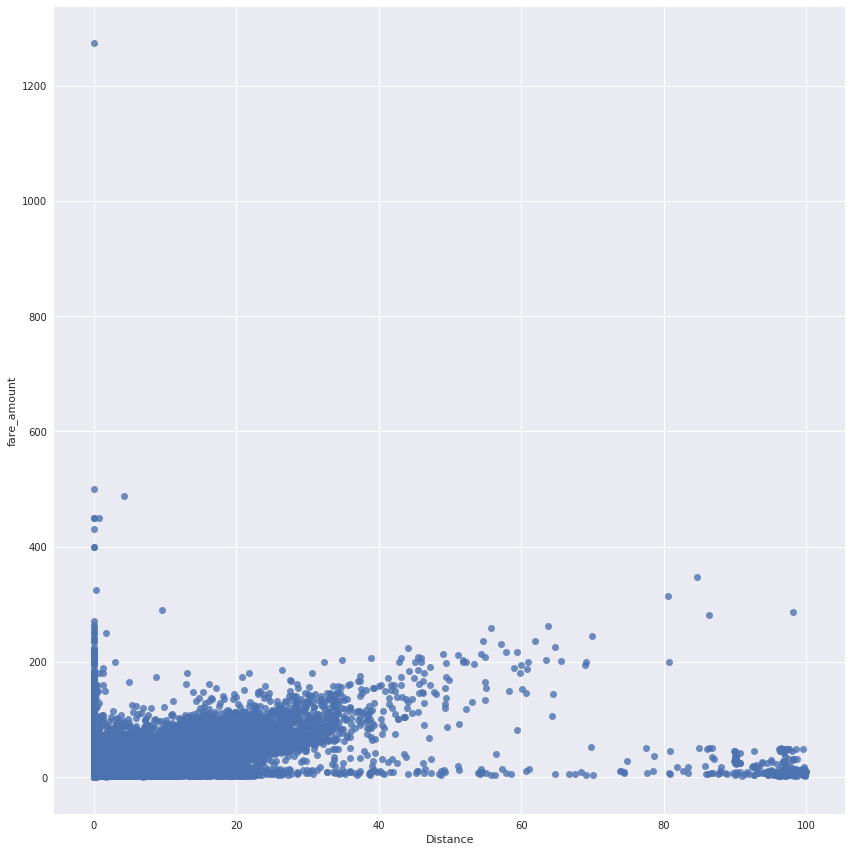

In [14]:
plt_data= train_data[train_data.Distance<100]
sns.lmplot('Distance', 
           'fare_amount', 
           data=plt_data,
           fit_reg=False, size=12)

In [15]:
train_data['day']=train_data['pickup_datetime'].dt.day
train_data['month']=train_data['pickup_datetime'].dt.month
train_data['year']=train_data['pickup_datetime'].dt.year
train_data['hour']=train_data['pickup_datetime'].dt.hour
train_data['day_of_week']=train_data['pickup_datetime'].dt.dayofweek
display(train_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,month,year,hour,day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601,15,6,2009,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441,5,1,2010,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,18,8,2011,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,21,4,2012,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,9,3,2010,7,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980,6,1,2011,9,3
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446,20,11,2012,20,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930,4,1,2012,17,2
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507,3,12,2012,13,0
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028,2,9,2009,1,2


In [16]:
test_data['day']=test_data['pickup_datetime'].dt.day
test_data['month']=test_data['pickup_datetime'].dt.month
test_data['year']=test_data['pickup_datetime'].dt.year
test_data['hour']=test_data['pickup_datetime'].dt.hour
test_data['day_of_week']=test_data['pickup_datetime'].dt.dayofweek
display(train_data.head(n=10))

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,month,year,hour,day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601,15,6,2009,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441,5,1,2010,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,18,8,2011,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,21,4,2012,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,9,3,2010,7,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980,6,1,2011,9,3
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446,20,11,2012,20,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930,4,1,2012,17,2
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507,3,12,2012,13,0
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028,2,9,2009,1,2


In [17]:
#From above distribution its clear that most of the fare amounts are under 100 and distance travelled by most people is under 40km

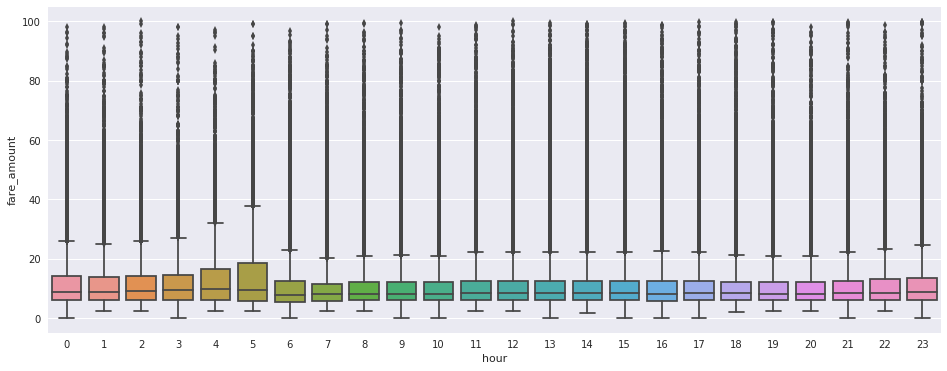

In [18]:
plt_data= train_data[train_data.fare_amount<100]
sns.boxplot('hour', 
           'fare_amount', 
           data=plt_data)

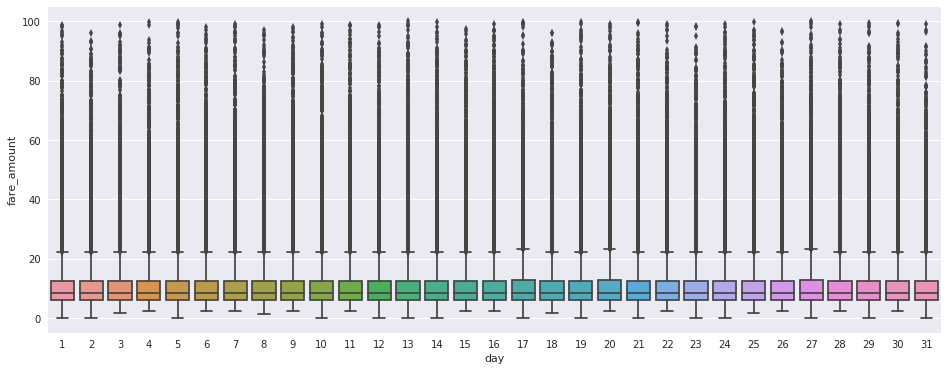

In [19]:
sns.boxplot('day', 
           'fare_amount', 
           data=plt_data)

In [20]:
# fare is higher in early hours of day and towards the end. This could be because there might be lesser taxis at that time

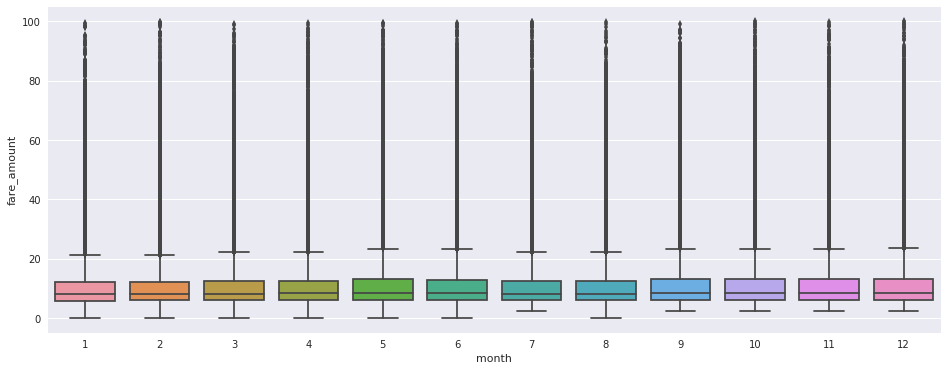

In [21]:
sns.boxplot('month', 
           'fare_amount', 
           data=plt_data)

In [22]:
# fare is uniform in all months

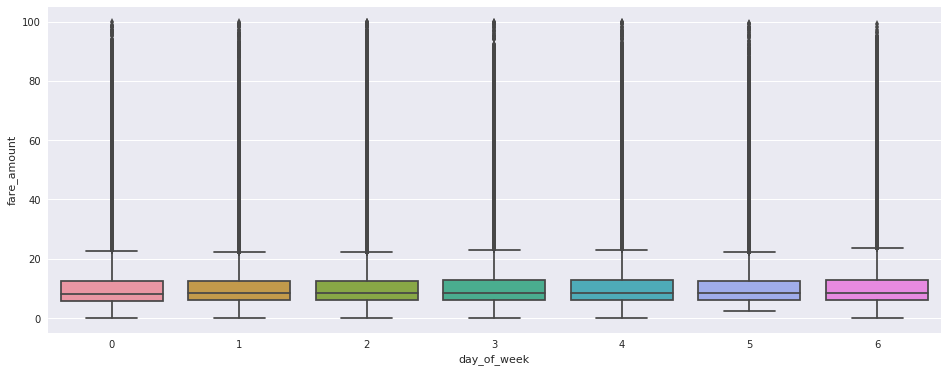

In [23]:
sns.boxplot('day_of_week', 
           'fare_amount', 
           data=plt_data)

In [24]:
#fare is almost same through out the week. 

In [25]:
#In general as distance increases, fare amount increases
train_dist_grt_300_or_lessthan_0 = train_data[train_data.Distance>300]
print(train_dist_grt_300_or_lessthan_0.shape)

(3961, 14)


In [26]:
#it's very unlikely to travel more than 300km ~~186miles in a cab. Most likely it could be error in data entry
#we calculate the distance for those based on fare amount.
#below numbers are based on online search from http://nymag.com/nymetro/urban/features/taxi/n_20286/
#minimum fare amount in nyc = 2.5 
#cost for every 1/5 mile = 40
#cost for 1km = 40*5/1.6 = 125 cents = 1.25$
# fare_amount = 2.5 + (dist * cost for 1km)
#dist = (fare_amount - 2.5)/1.25
#also calculating distance which have fare_amt

def get_new_dist(fare_amount, dist):
    if (dist <= 0 or dist < 300):
        return dist
    else:
        return (fare_amount - 2.5)/1.25

In [27]:
train_data['Distance'] = train_data[['fare_amount','Distance']].apply(lambda x: get_new_dist(x[0],x[1]), axis=1)
train_dist_grt_300_or_lessthan_0 = train_data[train_data.Distance>300]
print(train_dist_grt_300_or_lessthan_0.shape)

(0, 14)


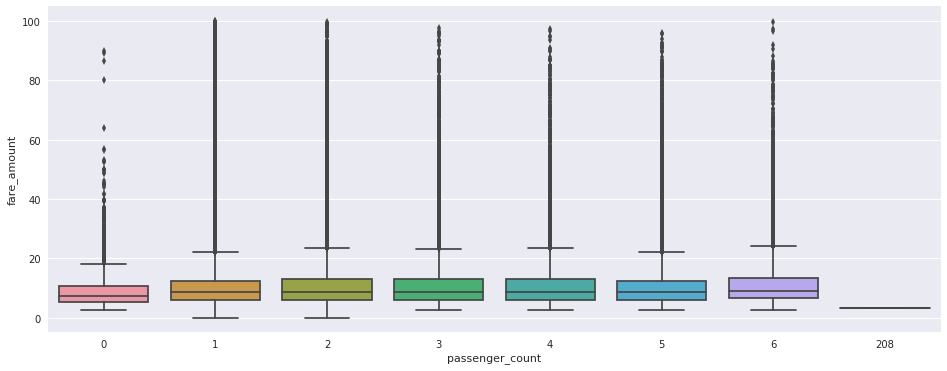

In [28]:
#checking distribution of passenger count with fare_amount
plt_data=train_data[train_data.fare_amount<100]
sns.boxplot('passenger_count', 
           'fare_amount', 
           data=plt_data)

In [29]:
plt_data['passenger_count'].describe()

count    1.998911e+06
mean     1.684282e+00
std      1.315118e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [30]:
#from above boxplot fare is almost independent of the number of passengers.
#Dropping rows with passenger count>6
train_data=train_data[train_data.passenger_count<=6]
test_data=test_data[test_data.passenger_count<=6]

print(train_data.shape)
print(test_data.shape)

(1999766, 14)
(9914, 13)


In [31]:
#Drop key and pickup date time 
display(train_data.head(n=10))
display(test_data.head(n=10))


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,month,year,hour,day_of_week
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.029601,15,6,2009,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.443441,5,1,2010,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389132,18,8,2011,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.795790,21,4,2012,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.998338,9,3,2010,7,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787980,6,1,2011,9,3
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.554446,20,11,2012,20,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.159930,4,1,2012,17,2
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.255507,3,12,2012,13,0
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.847028,2,9,2009,1,2


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,day,month,year,hour,day_of_week
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.320991,27,1,2015,13,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.423802,27,1,2015,13,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618182,8,10,2011,11,5
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.959671,1,12,2012,21,5
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.382833,1,12,2012,21,5
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.221143,1,12,2012,21,5
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.931700,6,10,2011,12,3
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.566812,6,10,2011,12,3
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.871424,6,10,2011,12,3
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.101426,18,2,2014,15,1


In [32]:
train_data = train_data.drop(['key','pickup_datetime'], axis = 1)
test_data = test_data.drop(['key','pickup_datetime'], axis = 1)


In [33]:
y_train = train_data['fare_amount']
X_train = train_data.drop('fare_amount', axis=1)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
#using 5 fold cross validation to compute the RMSE of training data
from sklearn.model_selection import cross_val_score
def getKFoldMeanRMSE(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    rmse_scores = np.sqrt(mse_scores)
    return rmse_scores.mean()

In [36]:
# calculate the average RMSE
print('kfold linear reg score', getKFoldMeanRMSE(model, X_train, y_train))

kfold linear reg score 6.67054204611


In [37]:
#predicting the values for test data
y_pred = model.predict(test_data)

In [38]:
#write ouput to file
output = pd.read_csv('./sample_submission.csv')
output['fare_amount'] = y_pred
output.to_csv('linear_reg.csv', index=False)

In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [40]:
print('kfold linear RandomForest reg rmse', getKFoldMeanRMSE(model, X_train, y_train))

kfold linear RandomForest reg rmse 4.53426697195


In [41]:
y_pred = model.predict(test_data)

In [42]:
output['fare_amount'] = y_pred
output.to_csv('random_forest.csv', index=False)

In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [44]:
#set parameters for xgboost
params = {'max_depth':[6,7,8],
          'eta':[1],
          'silent':[1],
          'learning_rate':[0.03, 0.06],
          'objective': ['reg:linear'], 
          'eval_metric': ['rmse'],
         }
num_rounds = 50

In [45]:
from sklearn.grid_search import GridSearchCV
import xgboost as xgb
gsearch = GridSearchCV(estimator = xgb.XGBRegressor(
        seed=1), 
        param_grid = params, 
        cv=4, scoring='neg_mean_squared_error',
        verbose = 1)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [46]:
gsearch.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 81.4min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.03, 0.06], 'eta': [1], 'silent': [1], 'max_depth': [6, 7, 8], 'eval_metric': ['rmse'], 'objective': ['reg:linear']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=1)

In [47]:
nmse=gsearch.best_score_
mse_score = -nmse
rmse = np.sqrt(mse_score)

In [48]:
print('GridSearchCV xgboost rmse', rmse)

GridSearchCV xgboost rmse 4.29029831911


In [49]:
gsearch.best_params_

{'eta': 1,
 'eval_metric': 'rmse',
 'learning_rate': 0.06,
 'max_depth': 8,
 'objective': 'reg:linear',
 'silent': 1}

In [50]:
watchlist = [ (dtrain, 'train'), (dtest, 'test')]
params = gsearch.best_params_
model = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	train-rmse:13.8727	test-rmse:13.7906
[1]	train-rmse:13.1349	test-rmse:13.0512
[2]	train-rmse:12.4464	test-rmse:12.3611
[3]	train-rmse:11.8042	test-rmse:11.717
[4]	train-rmse:11.2046	test-rmse:11.116
[5]	train-rmse:10.6455	test-rmse:10.5559
[6]	train-rmse:10.1254	test-rmse:10.035
[7]	train-rmse:9.64132	test-rmse:9.55043
[8]	train-rmse:9.19318	test-rmse:9.10121
[9]	train-rmse:8.77603	test-rmse:8.68365
[10]	train-rmse:8.3907	test-rmse:8.29801
[11]	train-rmse:8.033	test-rmse:7.9385
[12]	train-rmse:7.7029	test-rmse:7.60833
[13]	train-rmse:7.39824	test-rmse:7.30094
[14]	train-rmse:7.11648	test-rmse:7.0186
[15]	train-rmse:6.85735	test-rmse:6.75722
[16]	train-rmse:6.61931	test-rmse:6.518
[17]	train-rmse:6.40088	test-rmse:6.29773
[18]	train-rmse:6.20069	test-rmse:6.09628
[19]	train-rmse:6.01695	test-rmse:5.91283
[20]	train-rmse:5.84959	test-rmse:5.74297
[21]	train-rmse:5.69653	test-rmse:5.59109
[22]	train-rmse:5.55754	test-rmse:5.45094
[23]	train-rmse:5.42976	test-rmse:5.32306
[24]	train-rm

In [51]:
print(model.get_fscore())

{'Distance': 1684, 'month': 394, 'day_of_week': 266, 'passenger_count': 101, 'pickup_latitude': 1210, 'dropoff_longitude': 2289, 'dropoff_latitude': 1970, 'pickup_longitude': 2010, 'year': 875, 'day': 181, 'hour': 999}


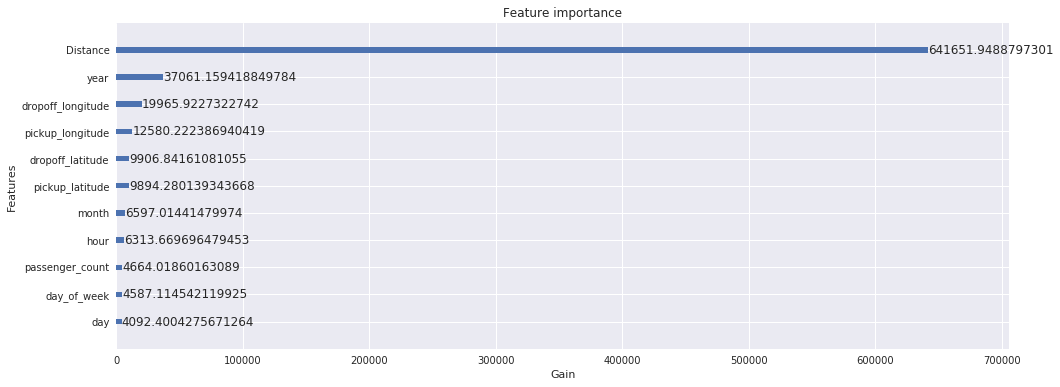

In [52]:
xgb.plot_importance(model, importance_type='gain', xlabel='Gain')

In [53]:
dtest=xgb.DMatrix(test_data)
y_pred = model.predict(dtest)

In [54]:
output['fare_amount'] = y_pred
output.to_csv('xgb.csv', index=False)